**cv2.drawContours() :** This method draws a contour. It can also draw a shape if you provide boundary points.

**Syntax:** cv.DrawContours(src, contour, contourIndex, colour, thickness)

**Parameters:**

**src:** n dimensional image

**contour:** contour points it can be list.

**contourIndex:**

* -1: draw all the contours

*To draw individual contour we can pass here index value*

**color:**color values

**thickness:** size of outline

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Shapes.png to Shapes.png


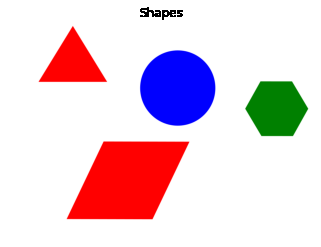

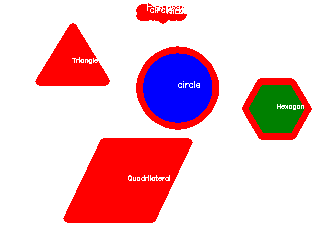

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# reading image
img = cv2.imread('Shapes.png')
cv2_imshow(img)

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
	threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# list for storing names of shapes
for contour in contours:

	# here we are ignoring first counter because
	# findcontour function detects whole image as shape
	if i == 0:
		i = 1
		continue

	# cv2.approxPloyDP() function to approximate the shape
	approx = cv2.approxPolyDP(
		contour, 0.01 * cv2.arcLength(contour, True), True)
	
	# using drawContours() function
	cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

	# finding center point of shape
	M = cv2.moments(contour)
	if M['m00'] != 0.0:
		x = int(M['m10']/M['m00'])
		y = int(M['m01']/M['m00'])

	# putting shape name at center of each shape
	if len(approx) == 3:
		cv2.putText(img, 'Triangle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.21, (255, 255, 255), 1)

	elif len(approx) == 4:
		cv2.putText(img, 'Quadrilateral', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.22, (255, 255, 255), 1)

	elif len(approx) == 5:
		cv2.putText(img, 'Pentagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

	elif len(approx) == 6:
		cv2.putText(img, 'Hexagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.21, (255, 255, 255), 1)

	else:
		cv2.putText(img, 'circle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.28, (255, 255, 255), 1)

# displaying the image after drawing contours
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()
